In [1]:
### import libraries


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns',None)

In [3]:
import folium

# Load the Big Game Census and All States Census 2017 Population Estimates data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx")
states_population = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/All states Census 2017 Population Estimates.xlsx")

In [4]:
# Count the number of players from each state
player_count_by_state = big_game_data['Player Birth State'].value_counts().reset_index()
player_count_by_state.columns = ['State', 'Player Count']

In [5]:
state_coordinates = {
    'Alabama': [32.806671, -86.791130],
    'Alaska': [61.370716, -152.404419],
    'Arizona': [33.729759, -111.431221],
    # ... Add coordinates for all states
}

In [ ]:
# Initialize a map centered in the United States
map_center = [37.0902, -95.7129]  # U.S. latitude and longitude
map = folium.Map(location=map_center, zoom_start=5)

map.show()

# Add markers for each state with size proportional to the player count
for _, row in player_count_by_state.iterrows():
    state = row['State']
    player_count = row['Player Count']
    if state in state_coordinates:  # Ensure the state has coordinates
        lat, lon = state_coordinates[state]
        folium.CircleMarker(
            location=[lat, lon],
            radius=player_count * 2,  # Size of the marker, proportional to player count
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f'{state}: {player_count} players'
        ).add_to(map)




AttributeError: 'Map' object has no attribute 'show'

In [16]:
import pandas as pd
import folium
from IPython.display import display

# Load the Big Game Census data

# Count the number of players from each state
player_count_by_state = big_game_data['Player Birth State'].value_counts().reset_index()
player_count_by_state.columns = ['State', 'Player Count']

# Coordinates for each state (example for a few states, you should add all)
state_coordinates = {
    'Alabama': [32.806671, -86.791130],
    'Alaska': [61.370716, -152.404419],
    'Arizona': [33.729759, -111.431221],
    'Arkansas': [34.969704, -92.373123],
    'California': [36.116203, -119.681564],
    'Colorado': [39.550051, -105.782067],
    'Connecticut': [41.603221, -73.087749],
    'Delaware': [38.802608, -75.52767],
    'Florida': [27.766279, -81.686783],
    'Georgia': [33.040619, -83.643074],
    # Add other states here...
}

# Initialize a Folium map centered on the U.S.
map_center = [37.0902, -95.7129]  # U.S. centered map
map = folium.Map(location=map_center, zoom_start=5)

# Add markers sized by player count for each state
for _, row in player_count_by_state.iterrows():
    state = row['State']
    player_count = row['Player Count']
    if state in state_coordinates:
        lat, lon = state_coordinates[state]
        folium.CircleMarker(
            location=[lat, lon],
            radius=player_count * 2,  # Size of the marker, proportional to player count
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f'{state}: {player_count} players'
        ).add_to(map)

# Display the map in the Jupyter Notebook
display(map)

In [9]:
# Save the map as an HTML file
map.save("player_birthplaces_map.html")

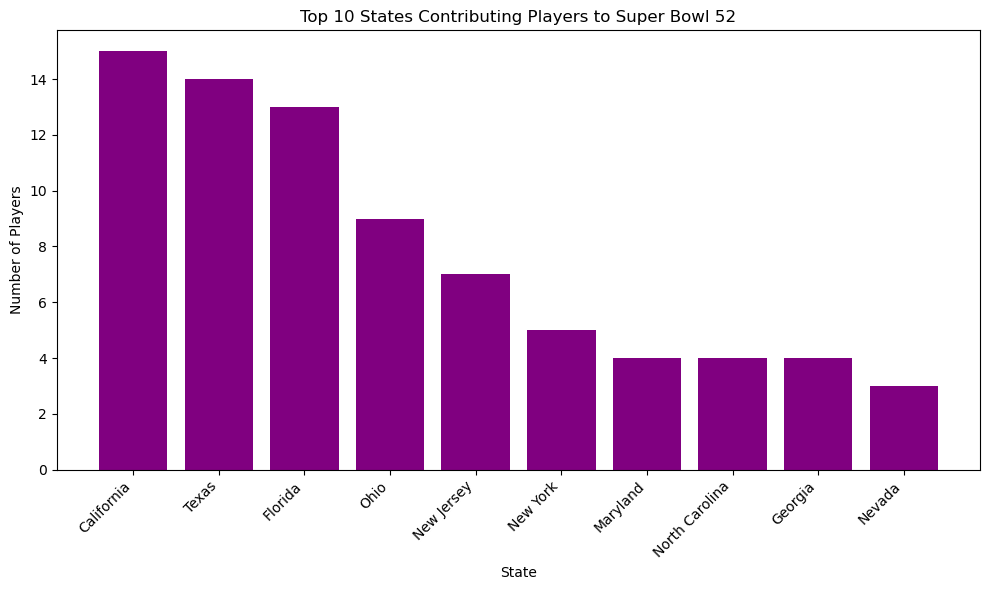

In [10]:
# Load the Big Game Census data
big_game_data = pd.read_excel("/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BIG GAME PROJECT/Data/Cleaned BIG GAME Census data.xlsx")

# Count the number of players from each state
player_count_by_state = big_game_data['Player Birth State'].value_counts().reset_index()
player_count_by_state.columns = ['State', 'Player Count']

# Sort the player count by descending order and get the top 10 states
top_10_states = player_count_by_state.head(10)

# Create a bar chart to compare the number of players from the top 10 states
plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State'], top_10_states['Player Count'], color='purple')
plt.xlabel('State')
plt.ylabel('Number of Players')
plt.title('Top 10 States Contributing Players to Super Bowl 52')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()